(150,)
[0.9085425058572986, 0.08911439304852219, 0.0022973301868548946, 4.57709073242939e-05]
        PC1       PC2       PC3  Y
0 -2.264703 -0.480027  0.127706  0
1 -2.080961  0.674134  0.234609  0
2 -2.364229  0.341908 -0.044201  0
3 -2.299384  0.597395 -0.091290  0
4 -2.389842 -0.646835 -0.015738  0


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

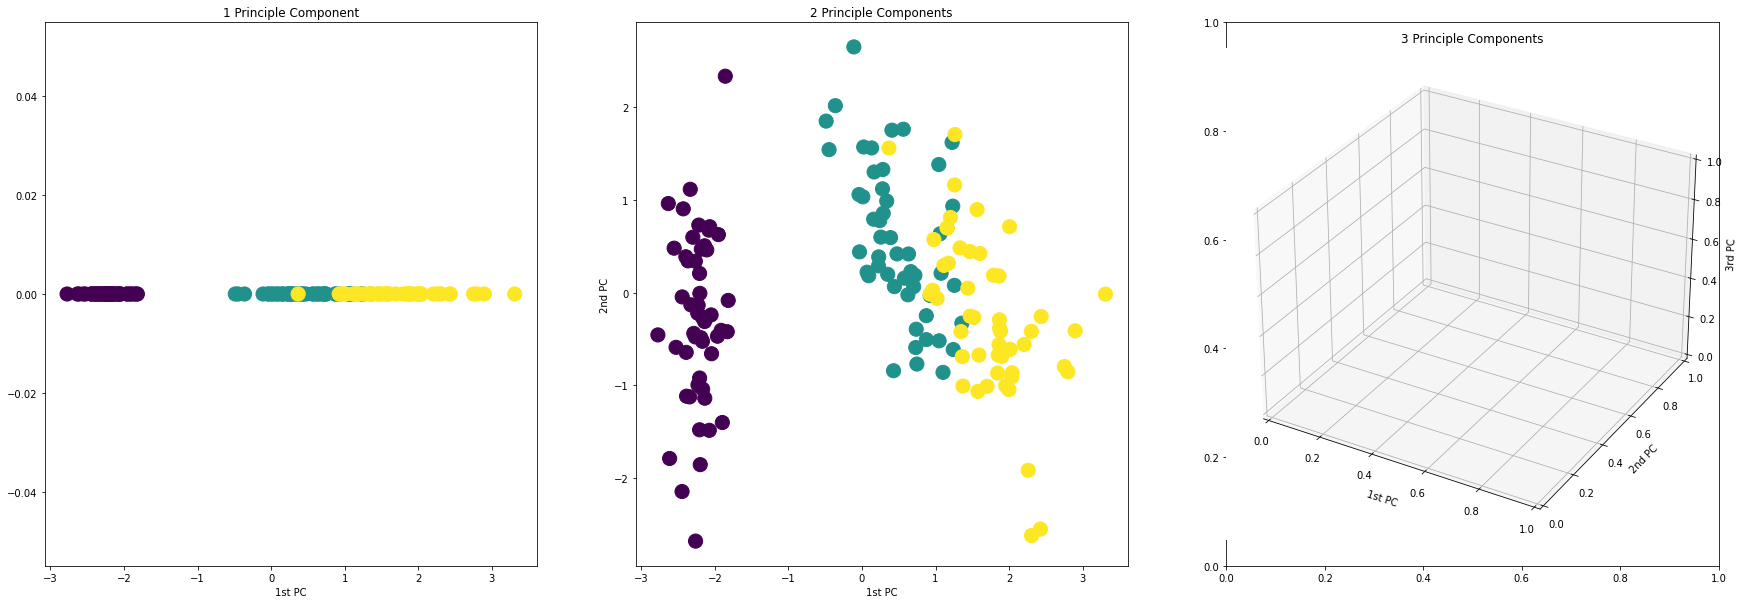

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

from decomposition.PCA import PCA, PCA_SVD

iris = load_iris()
X = iris.data
y = iris.target
print(y.shape)

X_scaled = StandardScaler().fit_transform(X)
X_mc,explained,U,S,Vt = PCA_SVD(X_scaled)
total = np.sum(S**2)
explained = [np.square(si) / total for si in S]
print(explained)

W_3 = Vt.T[:, :3]
proj = X_mc.dot(W_3)

res = pd.DataFrame()
for i in range(3):
    name = "PC" + str(i+1)
    res[name] = proj[:, i]

res["Y"] = y
print(res.head())

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].set(title="1 Principle Component", xlabel="1st PC")
axs[0].scatter(x=res["PC1"], y=np.zeros(y.shape[0]), c=res["Y"], s=200)

axs[1].set(title="2 Principle Components", xlabel="1st PC", ylabel="2nd PC")
axs[1].scatter(x=res["PC1"], y=res["PC2"], c=res["Y"], s=200)

ax3 = fig.add_subplot(133, projection = '3d')
ax3.set(title="3 Principle Components", xlabel="1st PC", ylabel="2nd PC", zlabel="3rd PC")
ax3.set_aspect('equal')
ax3.scatter(res["PC1"], res["PC2"], res["PC3"], c=res["Y"])

plt.show()